# Определение аномалий в данных для противодействия мошеничеству (сервис недвижимости)

Исходные данные содержат архив объявлений о продаже объектов недвижимости, доступна информация о площади, числе комнат, ближайших объектах и прочих характеристиках объекта.

**Задачей** является выявление аномалий в данных, что поможет в деятельности по противодействию мошеничеству. Также необходимо установить основные факторы ценообразования.

Начну с обзора, предобработки данных, затем введу новые данные, а также выявлю и визуализирую закономерности в датафрейме.

## Изучение данных из файла и предобработка

Импортирую библиотеки, изучу данные, сделаю обзор.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv')

In [ ]:
display(data)
data.info()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
...,...
23694,9\t9700000.0\t133.81\t2017-03-21T00:00:00\t3\t...
23695,14\t3100000.0\t59.0\t2018-01-15T00:00:00\t3\t\...
23696,18\t2500000.0\t56.7\t2018-02-11T00:00:00\t2\t\...
23697,13\t11475000.0\t76.75\t2017-03-28T00:00:00\t2\...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Данные нужно разделить, сейчас они в некорректном виде.

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [ ]:
display(data)
data.info()
print(data.columns)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посчитаю пропуски

In [ ]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


В ceiling_height и floors_total оставлю пропуски, заполнить по взаимосвязи с другим столбцом невозможно. Если удалить строки, много данных будет потеряно.

In [ ]:
print(data['is_apartment'].unique())

[nan False True]


is_apartment содержит булевы значения True и False, а также NaN.
Точно не знаю, может ли пропуск означать False, но это выглядит логично (если представить, как происходило заполнение).
Заменю пропуски на False.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Пропуски в living_area, kitchen_area есть соблазн заменить медианной, но все же так я внесу недостовеннрую информацию в данные. В locality_name, days_exposition сложно заменить значение, если оно пропущено, потому что нет прямой зависимости от других значений в том же столбце. 
Схожее расстояние от аэропорта не будет достаточным основанием для заполнения пропусков в названии населенного пункта. Причины пропусков могут заключаться в том, что люди просто не указали данные, возможно, не посчитали важным для описания недвижимости. Без адреса объекты почти теряют свою значимость в таблице. Поэтому сначала  удалю пропуски в locality_name (их немного).

In [ ]:
data.dropna(subset=['locality_name'], inplace=True)

В столбце balcony заменю пропуски на 0 (то есть балконов нет).

In [ ]:
data['balcony'] = data['balcony'].fillna(value=0)

Заменять пропуски в столбце ceiling_height не буду, потому что средняя (или медианная) высота потолка, например, по населенному пункту, или просто нулевое значение, будет не самым корректным значением. Скорее всего размещающий объявление просто не указал такую информацию об объекте.

Также есть пропуски в численных столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest попробую заменить пропуски в зависимости от местопложения объекта(locality_name), это могут быть неточные данные, но например, разница в несколько метров фактического расстояния от парка не будет серьезным искажением данных.

In [ ]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))
print(data.isna().sum())
display(data)

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9160
floors_total              85
living_area             1898
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2269
balcony                    0
locality_name              0
airports_nearest        5386
cityCenters_nearest     5386
parks_around3000        5510
parks_nearest           5998
ponds_around3000        5510
ponds_nearest           5494
days_exposition         3180
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Некоторое количество пропусков в этих данных осталось, потому что не везде можно заполнить по причине отсутствия значения для расчета медианы.

В столбцах parks_around3000, ponds_around3000, пропуски возможно связаны с тем, что этих объектов рядом нет. Если мы заполним медианным значением по локации, это будет не совсем корректно, потому что протяженность нескольких населеных пунктов значительно больше 3 километров. Но данных по размеру населенного пункта у нас нет в датафрейме.
В то же время мы не можем сказать, что если данные в этих столбцах не указаны, значит парков и водоемов в 3 километрах от объекта не имеется.

Проверим датафрейм на наличие дубликатов

In [ ]:
print(data.duplicated().sum())
display(data[data.duplicated()])

0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проверю неявные дубликаты в колонке с нечисловыми значениями

In [ ]:
display(data['locality_name'].value_counts())
pd.set_option('display.max_rows', 400)

Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
деревня Лаврики           1
посёлок Белоостров        1
посёлок Коробицыно        1
деревня Тихковицы         1
деревня Зимитицы          1
Name: locality_name, Length: 364, dtype: int64

Населенных пунктов много, но можно отметить из неявных дубликатов "посёлок" и "поселок".

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

## Расчеты и добавление данных в датафрейм

Для добавления цены квадратного метра, разделим актуальную стоимость на количество квдаратных метров.

In [ ]:
data['square_metre_price'] = data['last_price'] / data['total_area']

Для указания дня недели, месяца и год публикации объявления нужно разбить столбец first_day_exposition. Затем создам отдельные столбцы с показателями.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_metre_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,584.5,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Добавлю в таблицу ранжирование по этажу объекта в виде трех категорий: первый, последний, другой.

In [ ]:
def category(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor == 1:
         return 'первый'
    elif floor == floor_total:
         return 'последний'
    else:
          return 'другой'
data['floor_category'] = data.apply(category, axis=1)
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,584.5,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой


Добавлю соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [ ]:
data['living_and_total_ratio'] = data['living_area'] / data['total_area']
data['kitchen_and_total_ratio'] = data['kitchen_area'] / data['total_area']
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_and_total_ratio,kitchen_and_total_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,584.5,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,NaN,72490.845228,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,45.0,52542.372881,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,44091.710758,6,2,2018,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602.0,149511.400651,1,3,2017,другой,NaN,0.303583


В столбцах last_price, floors_total, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, square_metre_price хотелось бы заменить вещественные цифры на целочисленные для удобства.
Проблема в том, что в некоторых стоблбцах сохраняются NaN, которые я намеренно не стал заполнять, чтобы не искажать данные. 
Но методы to_numeric и astype так не срабатывают, можно заменить оставшиеся пропуски на специальное значение  '-1', но тогда пострадает качество дальнейших расчетов, например среднего и медианы.
Оставлю NaN, но далее выборочно удалю пропуски, когда это не повлияет на корректность данных.

## Исследовательский анализ данных: построение гистограмм по параметрам

Построю гистограммы для следующих показателей: площадь, цена, число комнат, высота потолков. Также подберу оптимальное количетсво корзин и диапазон для наглядного отображения.

<AxesSubplot:>

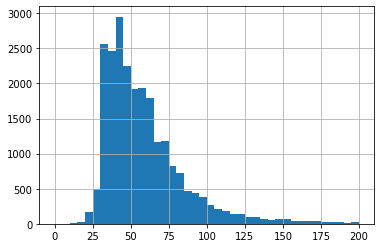

In [ ]:
data['total_area'].hist(bins=40, range=(0, 200))

763000000.0

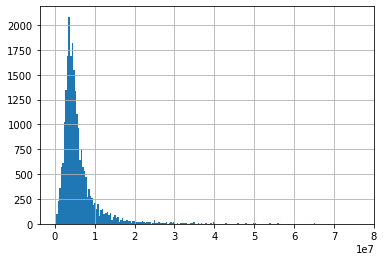

In [ ]:
data['last_price'].hist(bins=200, range=(0,76300000))
data['last_price'].max()

19

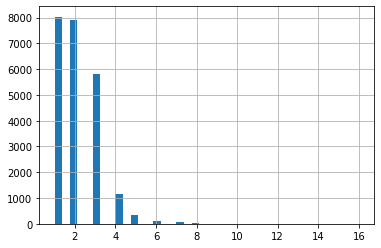

In [ ]:
data['rooms'].hist(bins=40, range=(1, 16))
data['rooms'].max()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_and_total_ratio,kitchen_and_total_ratio
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,NaN,259.0,65217.391304,3,7,2018,другой,0.579710,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,NaN,NaN,NaN,38666.666667,0,11,2018,другой,0.706667,0.106667
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,1.0,331.0,181.0,95555.555556,3,2,2018,другой,0.666667,0.155556
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,NaN,28.0,120000.000000,2,9,2017,другой,0.680000,NaN
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,1.0,578.0,7.0,126229.508197,2,10,2018,первый,0.639344,0.180328
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,NaN,NaN,540.0,46296.296296,4,10,2017,другой,0.555556,0.166667
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,0.0,503.0,267.0,88000.000000,1,8,2017,другой,0.426000,0.140000
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,3.0,80.0,38.0,101875.000000,2,1,2019,другой,0.512500,0.150000
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,2.0,73.0,NaN,74324.324324,0,3,2019,последний,0.704955,0.128378
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,0.0,503.0,NaN,94047.619048,6,3,2017,другой,0.714286,0.123810


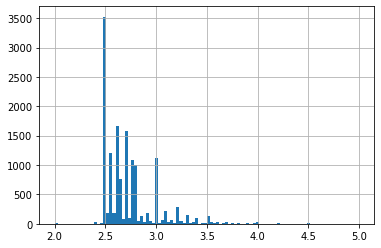

In [ ]:
data['ceiling_height'].hist(bins=100, range=(2, 5))
data['ceiling_height'].max()
display(data.query('ceiling_height > 10'))

In [ ]:
data = data.query('ceiling_height <= 10')
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_and_total_ratio,kitchen_and_total_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,503.0,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.512626,0.214646
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,3.0,298.0,366.0,82943.925234,5,7,2017,последний,0.630841,0.121495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,1.0,806.0,519.0,129903.978052,3,10,2016,другой,0.552812,0.145405
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,675.0,239.0,73717.948718,4,8,2016,другой,0.641026,0.128205
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,NaN,72490.845228,1,3,2017,другой,0.547792,0.103356
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602.0,149511.400651,1,3,2017,другой,NaN,0.303583


Здесь можно увидеть, что высота полотолка в некоторых объектах доходит до 30 метров, в двухуровненвых лофт-аппартаментах наверно теоретически можно представить высоту в 10 метров, но больше 10 метров потолок по логике быть не может. Удалю строки с потолком больше 10 метров. Графики в целом имеют нормальное распределение.

Изучу время продажи объекта недвижимости, количество дней периода с размещения объявления до продажи содержится в столбце "days_exposition". Построю гистограмму и посчитаю среднее и медиану.

<AxesSubplot:>

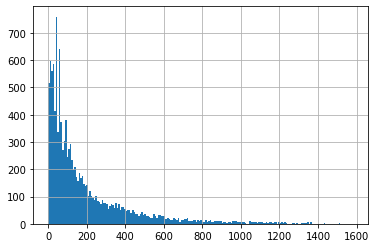

In [ ]:
data['days_exposition'].hist(bins=200, range=(0,1580))

<AxesSubplot:>

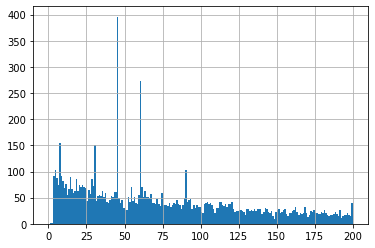

In [ ]:
data['days_exposition'].hist(bins=200, range=(0,200))

In [ ]:
data['days_exposition'].describe()

count    12018.000000
mean       190.412714
std        228.775527
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как мы видим среднее не очень помогает нам определить, что считать быстрой продажей или долгой, но медиана 103 и межквартильный размах с 45 по 237 показывают это более выраженно. Половина продаж происходит в течение 103 дней, при этом 25% процентов продаж происходит в первые 45 дней, что соответевнно можно назвать быстрой продажей. 
На гисторграмме мы видим даже пик продаж на 45-ый и 60-ый день, могу предположить, что это связано с тем, что в эти дни продавцу приходит уведомление с запросом о текущей актуальности объявления, и продавец соответсвенно снимает объявление в этот день, даже если фактически объект был продан раньше.
Также мы видим 25% объявлений снимаются только спустя 247 дней, они относятся к долгим продажам. Продажи после 600-го дня я бы назвал необычно долгими.

Посмотрю на редкие и выбивающиеся значения в других количественных столбцах.
В столбцах площади объекта мы видим, что вне межквартильного размаха находится некоторое количество объектов большой и очень большой площади, но я не вижу смысла их удалять, так как 500 метров это правдоподобная цифра площади.
В столбце с расстоянием до водоемов значения тоже реальные, а до парков расстояние доходит до 3км. Даже для маркетинга девелопмента это считается не совсем адекватным расстоянием. Но убирать строки с такими значениями я не буду, 3км от парка это все равно корректная информация, хоть она и говорит о том, что парк не рядом.

<AxesSubplot:>

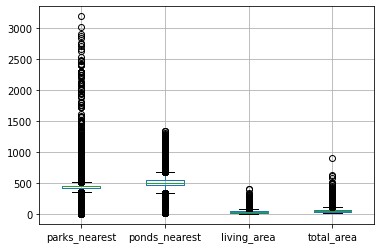

In [ ]:
data.boxplot(column=['parks_nearest', 'ponds_nearest', 'living_area', 'total_area'])

In [ ]:
data[['last_price', 'ceiling_height', 'rooms', 'total_area']].describe()

,last_price,ceiling_height,rooms,total_area
count,1.446500e+04,14465.000000,14465.000000,14465.000000
mean,6.837611e+06,2.727726,2.137366,61.895618
std,1.019287e+07,0.293018,1.099328,37.015379
min,1.219000e+04,1.000000,0.000000,12.000000
25%,3.570000e+06,2.510000,1.000000,41.000000
50%,4.850000e+06,2.650000,2.000000,53.400000
75%,7.000000e+06,2.800000,3.000000,71.300000
max,4.200000e+08,8.300000,16.000000,900.000000


In [ ]:
data = data.query('ceiling_height > 1.5')

Посмотрю, зависит ли цена от площади, числа комнат, удалённости от центра. 

In [ ]:
data['last_price'].corr(data['total_area'])

0.713075281332447

In [ ]:
data['last_price'].corr(data['rooms'])


0.40165064595317324

In [ ]:
data['last_price'].corr(data['cityCenters_nearest'])

-0.22629138038992075

Ожидаемо большая корреляция с площадью, также положительная корреляция цены с количеством комнат. Приближенность к центру города в меньшей степени влияет на цену.

Посмотрю зависимость цены от этажа(первый, последний или другой) и даты размещения: дня недели, месяца и года.
В столбце с категориями этажей данные категориальные, составлю график.

<AxesSubplot:xlabel='weekday_exposition'>

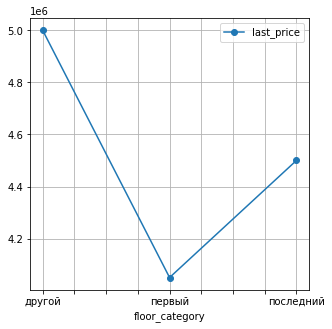

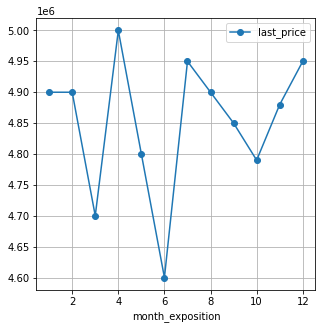

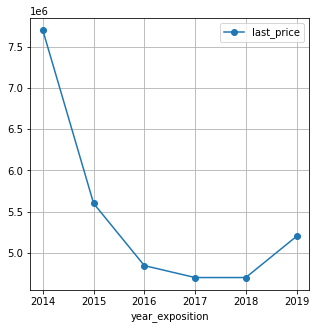

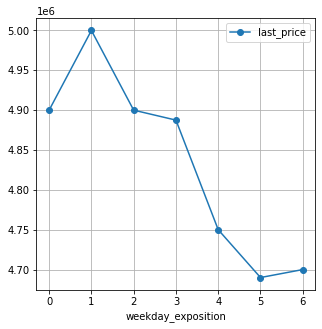

In [ ]:
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))

Как мы видим, медианная цена на объект недвижимости на последнем этаже выше, чем на первом этаже, но все же в общем объект на другом этаже добавляет ценности объекту.
Согласно построенным графикам, медианная цена значительно выыше в объявлениях, размещаемых в декабре. Цена снижалась с пика в 2014 году и в 2019 снова начала расти. В объявлениях, размещаемых на выходных, медианная цена немного ниже.

## Исследовательский анализ данных: местоположение объектов недвижимости как фактор ценообразования

Выделю 10 населённых пунктов с наибольшим числом объявлений и посчитаю среднюю цену квадратного метра в этих населённых пунктах.

In [ ]:
display(data['locality_name'].value_counts().head(10))

Санкт-Петербург      10088
Всеволожск             272
Пушкин                 234
поселок Шушары         217
поселок Мурино         212
Колпино                203
Гатчина                148
Петергоф               145
поселок Парголово      137
Сестрорецк             129
Name: locality_name, dtype: int64

In [ ]:
top_cities = ['Санкт-Петербург',
          'Пушкин',
          'Колпино',
          'Петергоф',
          'поселок Парголово',
          'Сестрорецк',
          'Красное Село',
          'Ломоносов',
          'Кронштадт',
          'поселок Стрельна'
         ]
(
    data.query('locality_name in @top_cities')
    .pivot_table(index='locality_name', values='square_metre_price', aggfunc='mean')
    .sort_values(by='square_metre_price', ascending=False)
)

,square_metre_price
locality_name,
Санкт-Петербург,115691.973577
Пушкин,103920.487928
Сестрорецк,102267.327328
поселок Стрельна,91005.781473
поселок Парголово,90901.351145
Петергоф,85554.144673
Кронштадт,80362.596865
Колпино,75938.525561
Ломоносов,73953.869391


Ожидаемо самая высокая стоимость жилья в Санкт-Петербурге, из топ-10 самых популярных локаций в среднем самое дешевое жилье в Красном Селе.

Изучу, как местоположение объекта недвижимости в Санкт-Петербурге относительно центра города влияет на среднюю цену. Создам столбец cityCenters_nearest_km, отражающий близость объекта к центру в километрах. Затем построю график средней цены в зависимости от местоположения.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

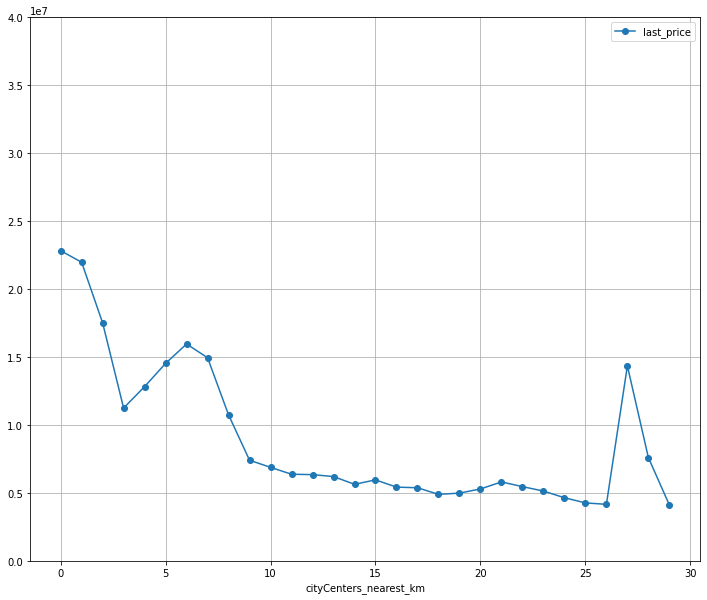

In [ ]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
    .plot(grid=True, style='o-', figsize=(12, 10), ylim=(0, 40000000))
)

Цена на объекты недвижимости, которые расположены в девяти километрах от центра значительно повышаются, особенно резкий скачок средней цены мы наблюдаем на объекты в 3 км от центра. Таким образом я бы выделил 2 зоны: "близко к центру" (диапазон 2.5-9км) и "в самом центре" (0-2.5км). Рассмотрю их более подробно.

In [ ]:
spb_near_center_flats = data.query('locality_name == "Санкт-Петербург" and 2.5 < cityCenters_nearest_km <= 9')
spb_city_heart_flats = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 2.5')

In [ ]:
spb_city_heart_flats.pivot_table(index='locality_name', values=['total_area', 'rooms', 'ceiling_height', 'floors_total'], aggfunc=['mean', 'median'])

mean                                     \
                ceiling_height floors_total     rooms  total_area   
locality_name                                                       
Санкт-Петербург        3.24172      4.88172  3.206989  104.569435   

                        median                                
                ceiling_height floors_total rooms total_area  
locality_name                                                 
Санкт-Петербург            3.2          5.0     3       92.0

In [ ]:
spb_near_center_flats.pivot_table(index='locality_name', values=['total_area', 'rooms', 'ceiling_height', 'floors_total'], aggfunc=['mean', 'median'])

mean                                    \
                ceiling_height floors_total     rooms total_area   
locality_name                                                      
Санкт-Петербург       2.993151     8.042238  2.678638  86.176187   

                        median                                
                ceiling_height floors_total rooms total_area  
locality_name                                                 
Санкт-Петербург            3.0          6.0     3       72.5

In [ ]:
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km >= 9').pivot_table(index='locality_name', values=['total_area', 'rooms', 'ceiling_height', 'floors_total'], aggfunc=['mean', 'median'])

mean                                    \
                ceiling_height floors_total     rooms total_area   
locality_name                                                      
Санкт-Петербург       2.658825    12.255676  2.009992  56.399787   

                        median                                
                ceiling_height floors_total rooms total_area  
locality_name                                                 
Санкт-Петербург            2.6         10.0     2     50.455

Мы видим, что чем ближе к центру, тем ниже этажность домов, выше потолки и больше количество комнат. Повышается и средняя площадь объекта. То есть по основным показателям объект в центре лучше, соответсвенно в среднем объекты дальше от центра не компенсируют удаленность другими характеристиками.

Далее построю графики зависимости цены категорий "близко к центру" и "в самом центре" от следующих показателей: число комнат, этаж, удалённость от центра, дата размещения объявления.

<AxesSubplot:title={'center':'В самом центре: зависимость цены от этажа'}, xlabel='floor'>

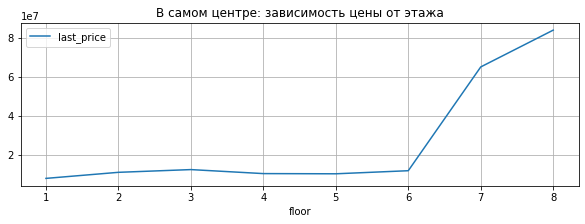

In [ ]:
(
    spb_city_heart_flats.query('last_price < 100000000')
    .pivot_table(index='floor', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3), title='В самом центре: зависимость цены от этажа')
         )

<AxesSubplot:title={'center':'Близко к центру: зависимость цены от этажа'}, xlabel='floor'>

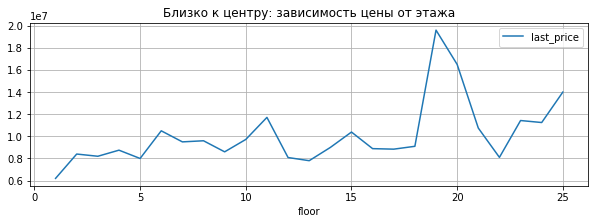

In [ ]:
(
    spb_near_center_flats
    .pivot_table(index='floor', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3), title='Близко к центру: зависимость цены от этажа')
         )

<AxesSubplot:title={'center':'В самом центре: зависимость цены от близости к центру'}, xlabel='cityCenters_nearest_km'>

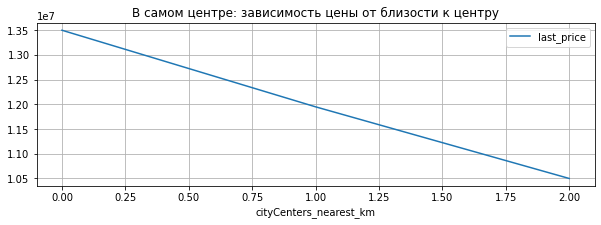

In [ ]:
(
    spb_city_heart_flats
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3),  title='В самом центре: зависимость цены от близости к центру')
         )

<AxesSubplot:title={'center':'Близко к центру: зависимость цены от близости к центру'}, xlabel='cityCenters_nearest_km'>

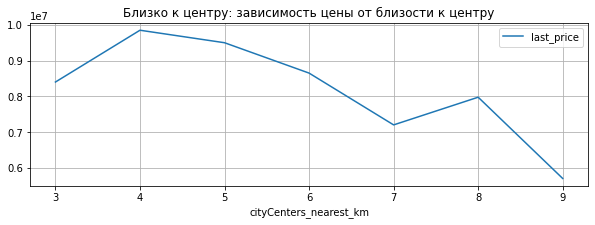

In [ ]:
(
    spb_near_center_flats
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3),  title='Близко к центру: зависимость цены от близости к центру')
         )

<AxesSubplot:title={'center':'В самом центре: зависимость цены от срока размещения объявления'}, xlabel='days_exposition'>

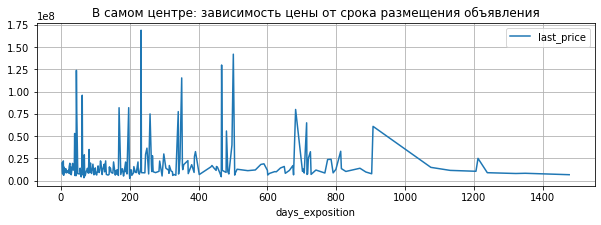

In [ ]:
(
    spb_city_heart_flats
    .pivot_table(index='days_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3), title='В самом центре: зависимость цены от срока размещения объявления')
         )

<AxesSubplot:title={'center':'Близко к центру: зависимость цены от срока размещения объявления'}, xlabel='days_exposition'>

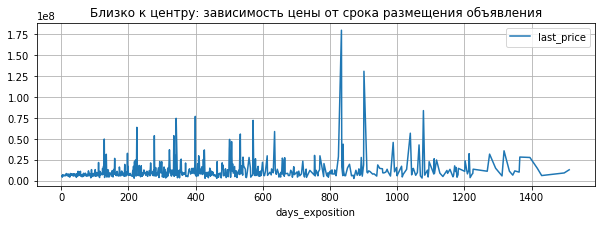

In [ ]:
(
    spb_near_center_flats
    .pivot_table(index='days_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3), title='Близко к центру: зависимость цены от срока размещения объявления')
         )

In [ ]:
print(spb_city_heart_flats['days_exposition'].corr(spb_city_heart_flats['last_price']))
print(spb_near_center_flats['days_exposition'].corr(spb_near_center_flats['last_price']))

0.040614438366652746
0.09803698367455486


<AxesSubplot:title={'center':'В самом центре: зависимость цены от кол. комнат'}, xlabel='rooms'>

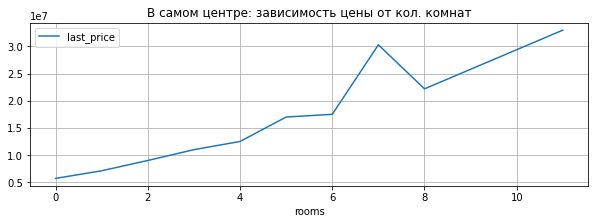

In [ ]:
(
    spb_city_heart_flats
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3), title='В самом центре: зависимость цены от кол. комнат')
         )

<AxesSubplot:title={'center':'Близко к центру: зависимость цены от кол. комнат'}, xlabel='rooms'>

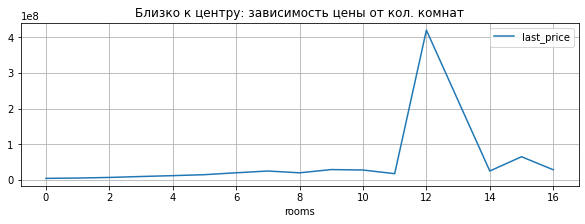

In [ ]:
(
    spb_near_center_flats
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3), title='Близко к центру: зависимость цены от кол. комнат')
         )

Здесь сразу хочется отметить, что данный график по количеству комнат не очень наглядный, с одним сильно выбивающимся пиком. Это вызвано тем, что здесь есть объекты дороже 400 миллионов и даже 763 миллиона. Это реальные цифры, удалять их не имеет смысла, но для большей информативности графика, удалю из него показатели трех объектов.

<AxesSubplot:title={'center':'Близко к центру: зависимость цены от кол. комнат'}, xlabel='rooms'>

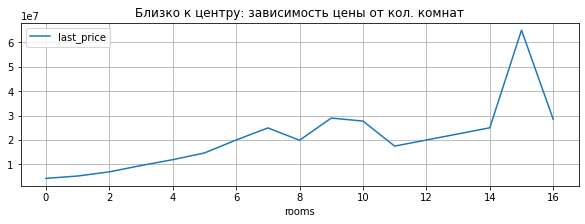

In [ ]:
(
    spb_near_center_flats
    .query('last_price < 400000000')
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 3), title='Близко к центру: зависимость цены от кол. комнат')
         )

Итак, из построенных графиков двух центральных категорий можно сделать следующие выводы:
1. "В самом центре" с 6 этажа наблюдается резкий скачок цен, но самих объектов стоимостью более 30 миллионов в данной категории не так много, у основной части объектов недвижимости этаж не так сильно влияет на стоимость. В категории "близко к центру" скачок цены на графике заметен в районе 15 этажей.
2. В отношении отдаленность от центра сохраняется тенденция, что цена повышается, чем меньше расстояние от центра, особенно сильно на графиках прослеживается рост цены начиная с расстояния в 1км от центра.
3. Количество дней, прошедших с момента публикации объявления, имеют очень малую корреляцию со стоимостью объекта, могу предположить, что пики на графике связаны с внешними факторами.
4. Логично, чем больше комнат, тем выше стоимость, цена повышается равномерно, скачок на графике в районе 10 комнат связан только небольшого количества чем с 10 комнатами (8 объектов "близко к центру", 2 объекта "в самом центре")

## Общий вывод

Данные были изучены и преобразованы, удалена часть пропусков, но часть оставлена, для корректности данных. Также я добавил новые столбцы в датафрейм, которые могут быть полезны оценки недвижимости, при этом отдельно продавцу их заполнять не надо. Визуализация данных на графиках позволила более наглядно рассмотреть средние показатели и выбивающиеся значения, часть аномалий было удалено, другая часть оставлена, так как некоторые дорогие объекты недвижимости сильно отличаются по многим показателям от средних.
Было отмечено, что некоторые данные (например расстояние до ближайшего парка) можно было бы ограничить другим диапазоном, иначе вводимая продавцом информация не совсем релевантна. Была выявлена и визуализирована корреляция различных показателей объекта к его стоимости, в целом по датафрейму, а также отдельно для двух центральных категорий по местоположению.

Здесь можно выделить параметры для определения аномальных или мошеннических объявлений. В столбце с высотой потолка используются нереалистичные значения, это может быть использовано например для того, чтобы объявление было выше в поиске. Также стоило бы для большей корректности объявлений оставлять в строке с ближайшей рекреационной зоной (близость парка, водоема) только объекты с рассточнием до 1.5 км, а если показатель больше  - пусть там будет пропуск. Также стоит не допускать объявления, в которых указана цена, например, 100000 рублей.